<a href="https://colab.research.google.com/github/mccoymb/AAE-590-DSMM/blob/main/590DSMM_HW3_GeneratedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Upload the CSV file
uploaded = files.upload()


df = pd.read_excel("GeneratedExcel.xlsx")

# Extract independent and dependent variables
X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as independent variable
dependent_vars = df.columns[1:13]  # Columns B-M as dependent variables
# Print X and dependent variables
print("Independent Variable (X):", X)
print("Dependent Variables:", dependent_vars.tolist())

Saving GeneratedExcel.xlsx to GeneratedExcel (1).xlsx
Independent Variable (X): [[0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]
 [0.5 ]
 [0.55]
 [0.6 ]
 [0.65]
 [0.7 ]]
Dependent Variables: ['Holes 1mm', 'Mat A 1mm', 'Mat B 1mm', 'Holes 5mm', 'Mat A 5mm', 'Mat B 5mm', 'Holes 100N', 'Mat A 100N', 'Mat B 100N', 'Holes 500N', 'Mat A 500N', 'Mat B 500N']


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


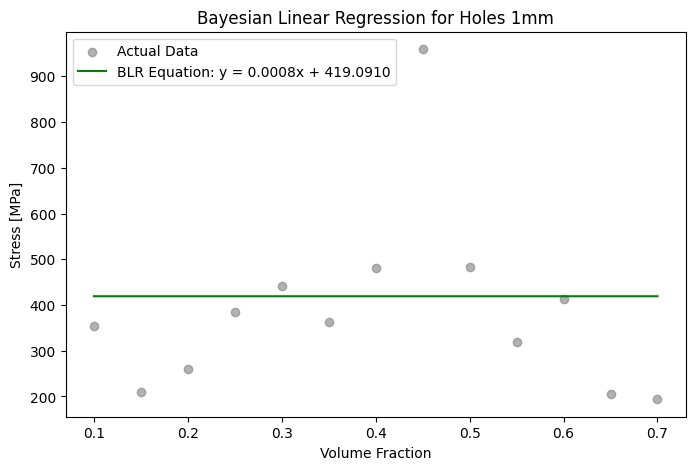

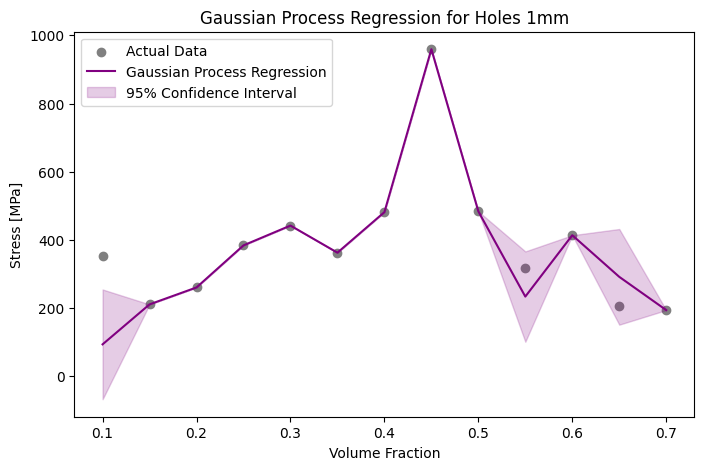

In [ ]:
col_index = 1
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


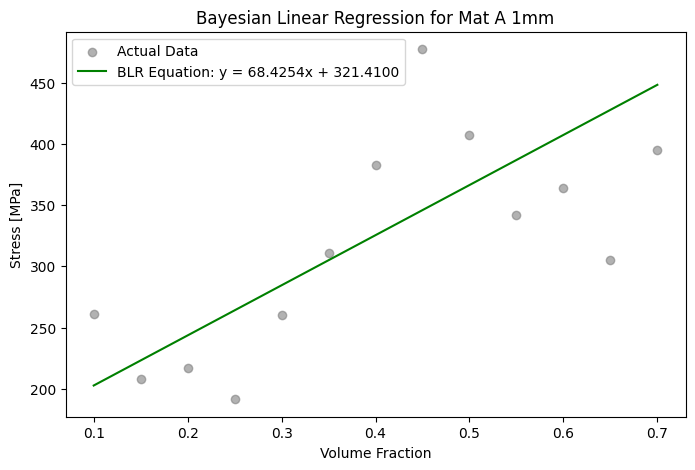

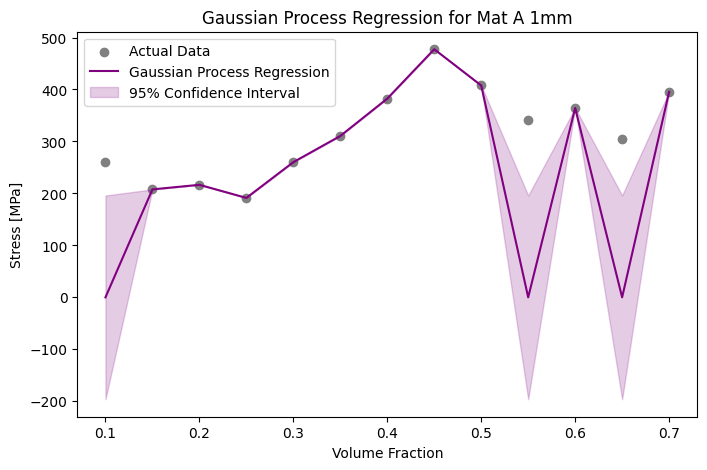

In [ ]:
col_index = 2
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


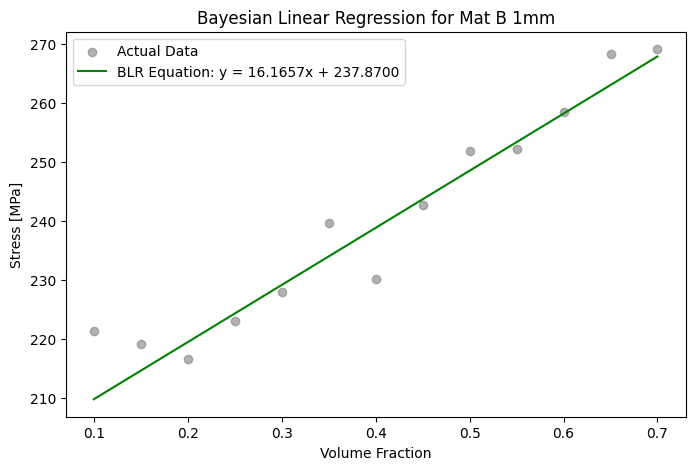

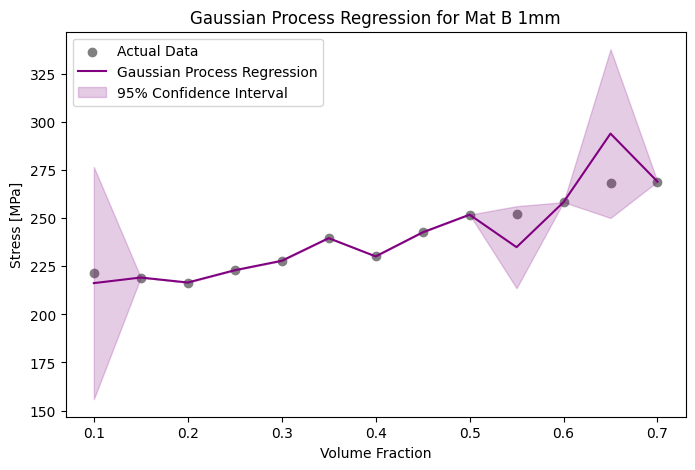

In [ ]:
col_index = 3
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


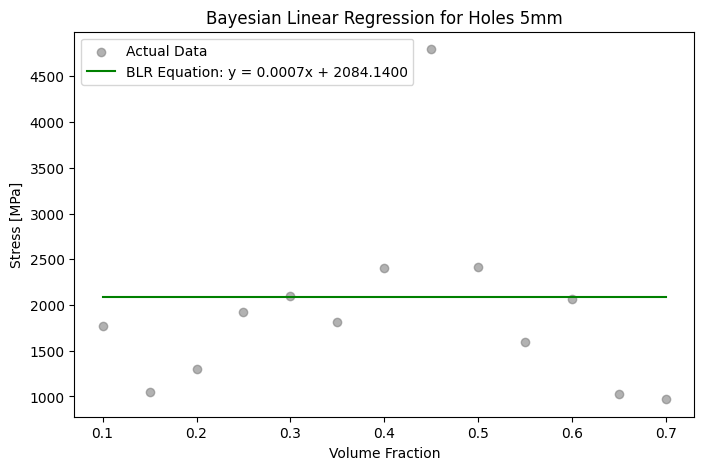

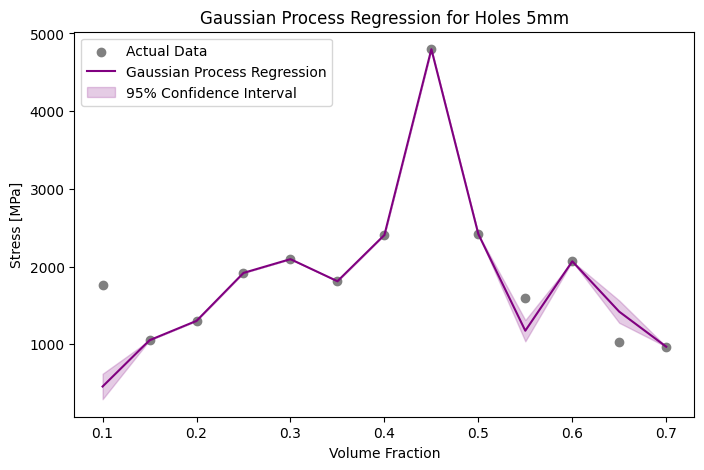

In [ ]:
col_index = 4
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


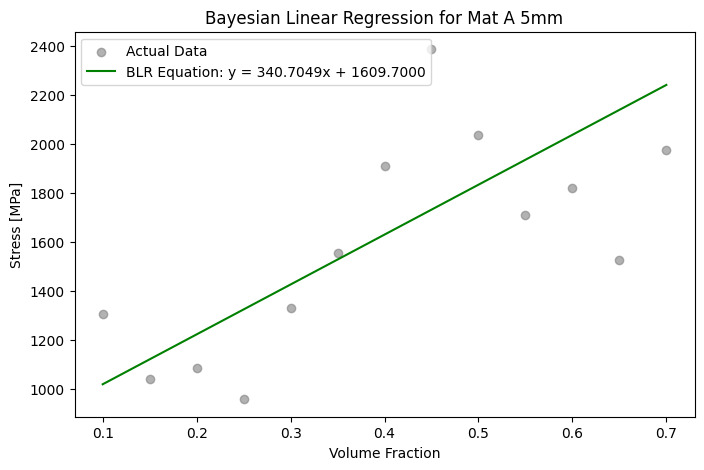

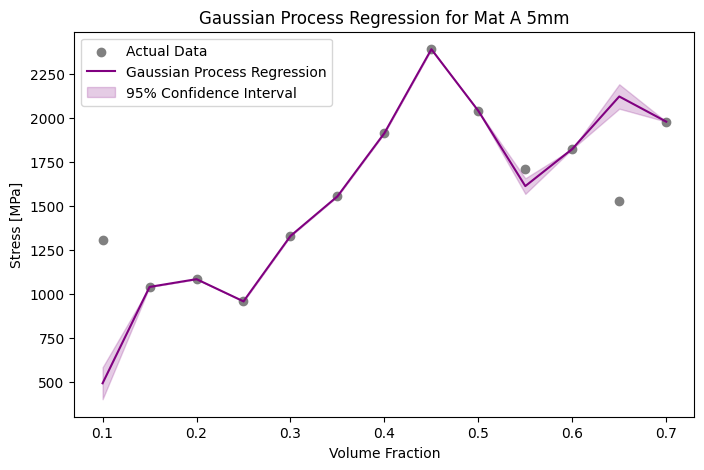

In [ ]:
col_index = 5
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Stress [MPa]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

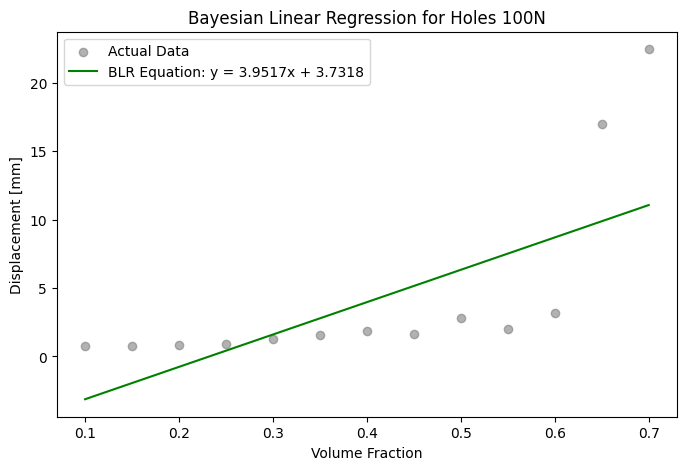

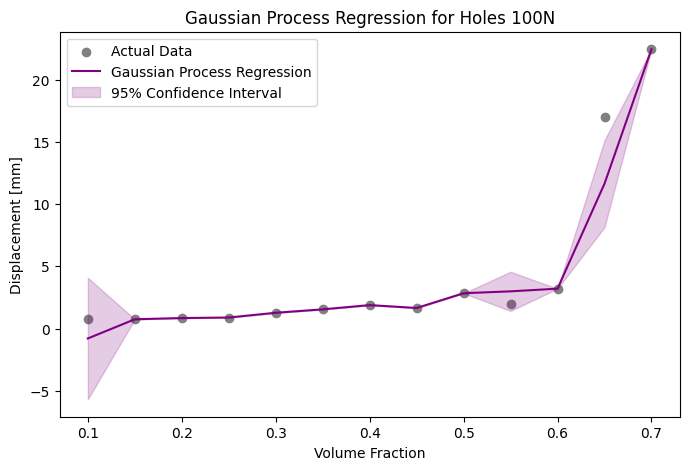

In [ ]:
col_index = 7
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

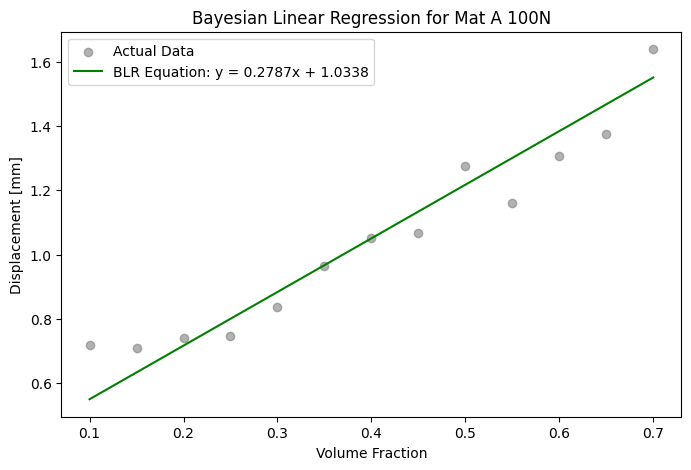

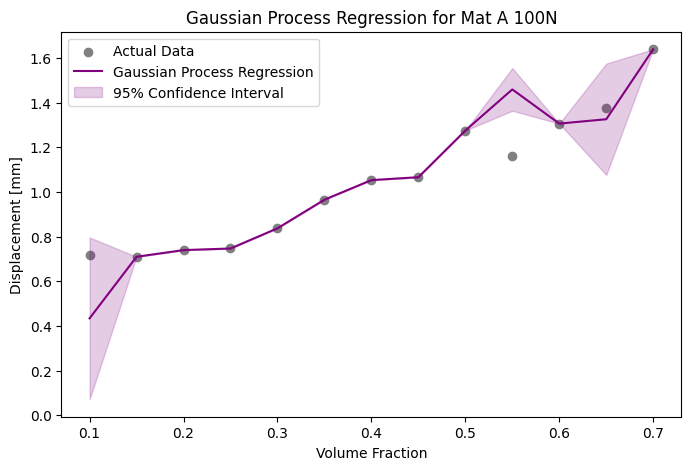

In [ ]:
col_index = 8
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

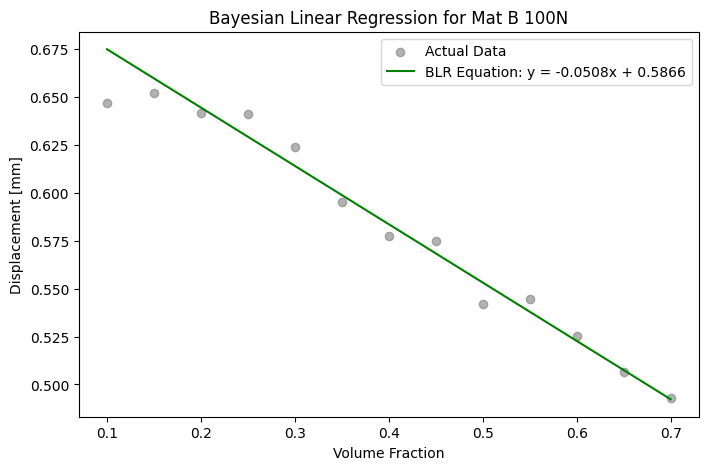

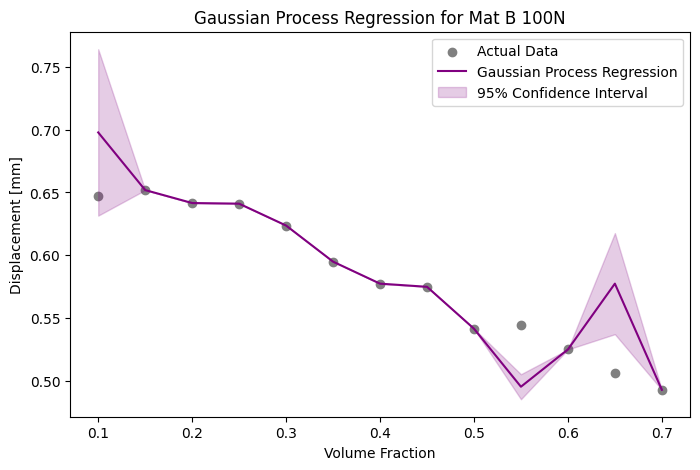

In [ ]:
col_index = 9
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

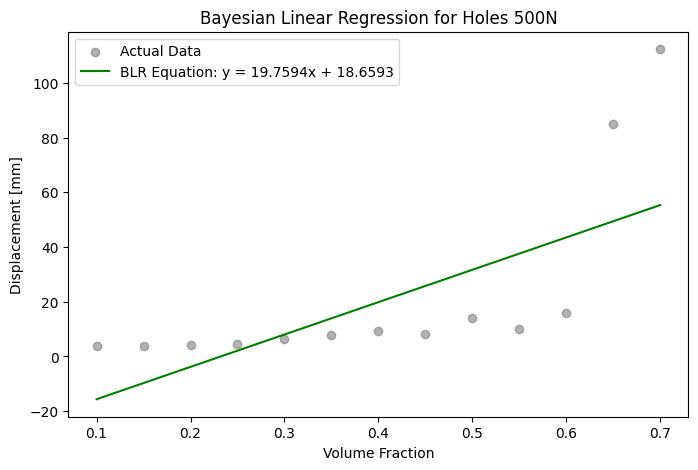

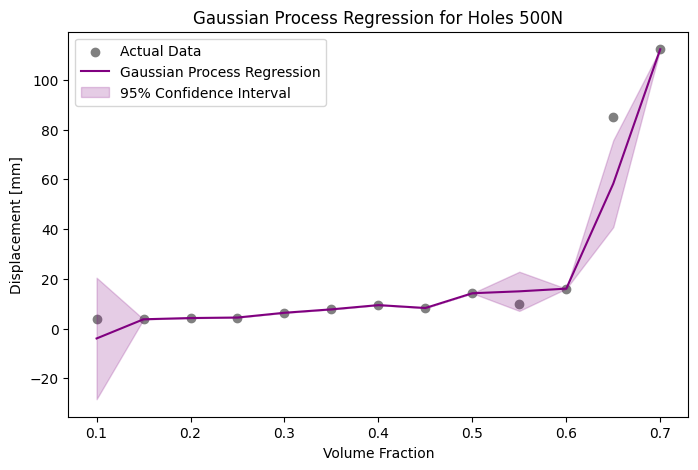

In [ ]:
col_index = 10
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

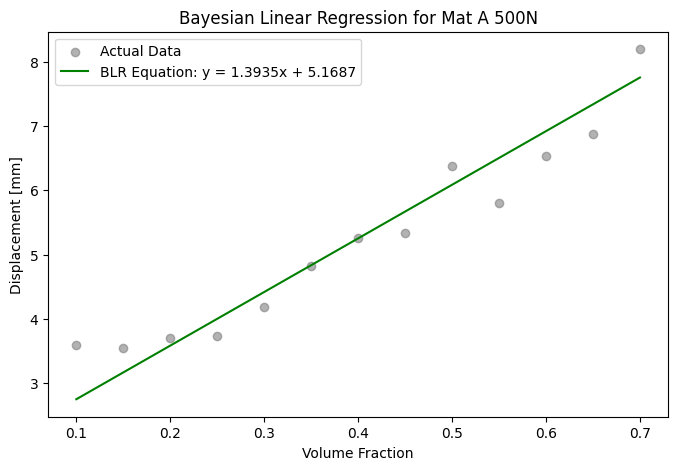

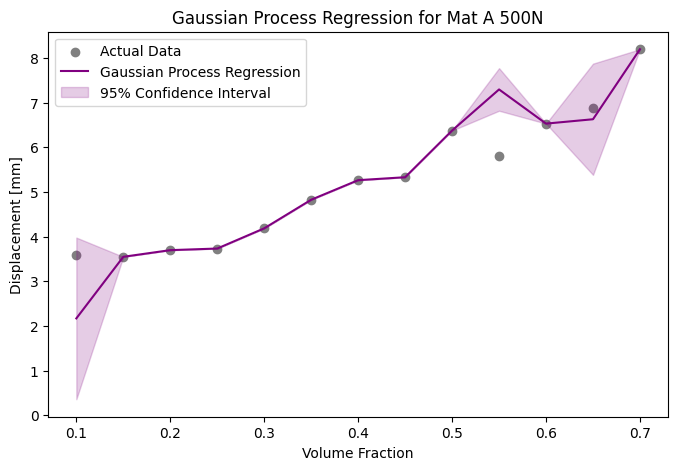

In [ ]:
col_index = 11
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()

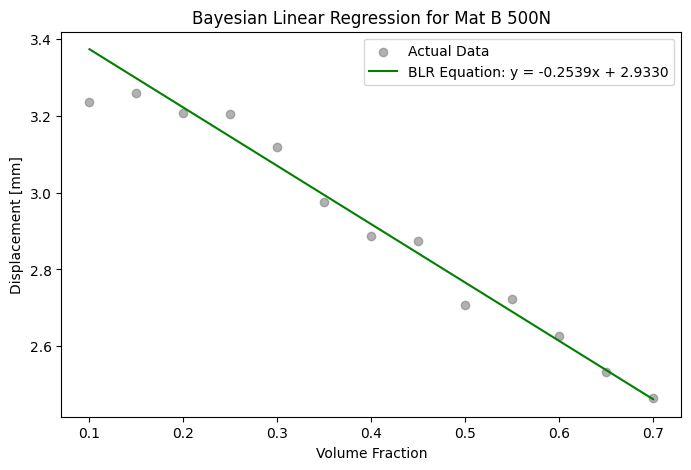

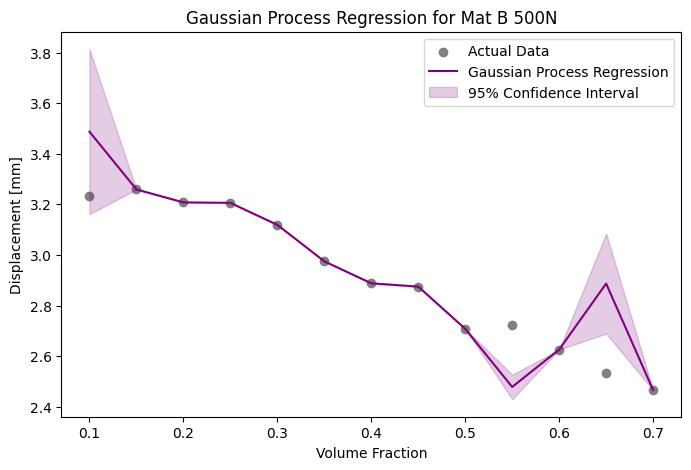

In [ ]:
col_index = 12
y = df.iloc[:, col_index].values
y_col = df.columns[col_index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# BLR
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)
y_pred_bayes = bayes_ridge.predict(X_scaled)
bayes_eq = f"y = {bayes_ridge.coef_[0]:.4f}x + {bayes_ridge.intercept_:.4f}"

# GPR
kernel = C(1, (1e-3, 1e4)) * RBF(1.0, (1e-2,1e2))  # From Lecture 11 slide 10 Example
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train_scaled, y_train)
y_pred_gpr, sigma = gpr.predict(X_scaled, return_std=True)

# Plot BLR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred_bayes, color='green', label=f'BLR Equation: {bayes_eq}')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Bayesian Linear Regression for {y_col}')
plt.legend()
plt.show()

# Plot GPR
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='gray', alpha=1, label='Actual Data')
plt.plot(X, y_pred_gpr, color='purple', label='Gaussian Process Regression')
plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * sigma, y_pred_gpr + 1.96 * sigma,
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Volume Fraction")
plt.ylabel("Displacement [mm]")
plt.title(f'Gaussian Process Regression for {y_col}')
plt.legend()
plt.show()